In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error as MAE,mean_squared_error as MSE
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df= pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA & Feature Engineering:

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df["age"].isna().sum()

0

#### No null values in column "age" and min = 18, max = 64

In [6]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
df.bmi.isna().sum()

0

#### No null value in col "bmi"

In [8]:
df.children.isna().sum()

0

#### No null value in col "children"

In [9]:
df.smoker.isna().sum()

0

#### No null value in col "smoker"

In [10]:
df.region.isna().sum()

0

#### No null value in col "region"

In [11]:
df.charges.isna().sum()

0

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df_copy = pd.get_dummies(df)

<AxesSubplot:>

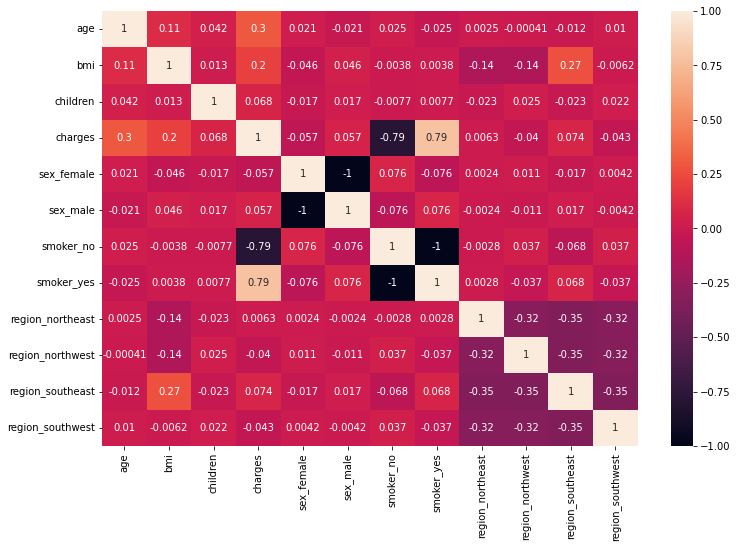

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),annot =True)

# Split data

In [15]:
x,y = df_copy.drop("charges",axis=1), df_copy.charges

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=2)

# Linear model

In [17]:
LinReg_model = LinearRegression()

LinReg_model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred_train = LinReg_model.predict(x_train)
y_pred_test = LinReg_model.predict(x_test)

In [19]:
# Trainning Accuracy:
r2score_train = r2_score(y_train,y_pred_train)
r2score_train

0.7504716453306411

In [20]:
# Testing Accuracy:
r2score_test = r2_score(y_test,y_pred_test)
r2score_test

0.7499919893222635

# Hyper Param tuning

In [21]:
Lasso_model  = Lasso()

gscv = GridSearchCV(Lasso_model,param_grid={"alpha":np.arange(0.01,1,0.01)})
gscv.fit(x_train,y_train)
gscv.best_estimator_

Lasso(alpha=0.99)

In [22]:
Lasso_model = gscv.best_estimator_
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.99)

In [23]:
y_pred_train = Lasso_model.predict(x_train)
y_pred_test = Lasso_model.predict(x_test)

In [24]:
# Trainning Accuracy:
r2score_train = r2_score(y_train,y_pred_train)
r2score_train

0.750471444050267

In [25]:
# Testing Accuracy:
r2score_test = r2_score(y_test,y_pred_test)
r2score_test

0.7499852123664383

In [26]:
Lasso_model.coef_

array([   247.37198162,    333.17397662,    609.13232823,    203.2128489 ,
           -0.        , -23739.70481661,      0.        ,    821.64890923,
          399.93437396,     -0.        ,   -195.83757219])

<AxesSubplot:>

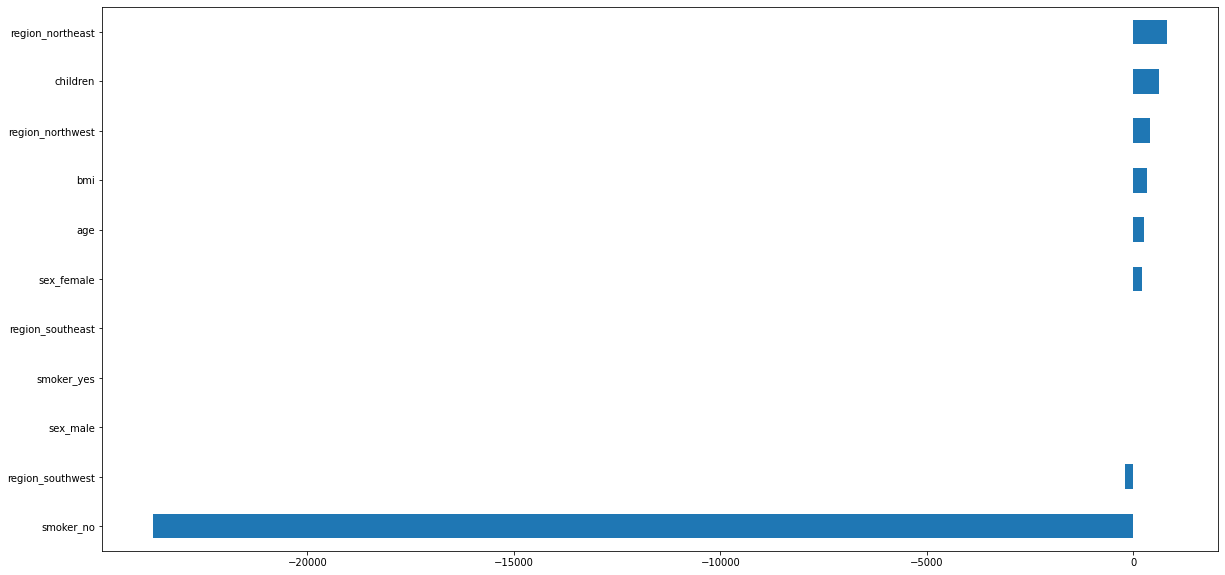

In [27]:
s2 = pd.Series(Lasso_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind = 'barh')

# Ridge Model

In [28]:
ridge_model = Ridge()
gscv = GridSearchCV(ridge_model,param_grid={"alpha":np.arange(0.01,1,0.01)})
gscv.fit(x_train,y_train)
gscv.best_estimator_


Ridge(alpha=0.99)

In [29]:
ridge_model = gscv.best_estimator_
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.99)

In [30]:
y_pred_train = Lasso_model.predict(x_train)
y_pred_test = Lasso_model.predict(x_test)

In [31]:
# Trainning Accuracy:
r2score_train = r2_score(y_train,y_pred_train)
r2score_train

0.750471444050267

In [32]:
# Testing Accuracy:
r2score_test = r2_score(y_test,y_pred_test)
r2score_test

0.7499852123664383

In [33]:
Lasso_model.coef_

array([   247.37198162,    333.17397662,    609.13232823,    203.2128489 ,
           -0.        , -23739.70481661,      0.        ,    821.64890923,
          399.93437396,     -0.        ,   -195.83757219])

<AxesSubplot:>

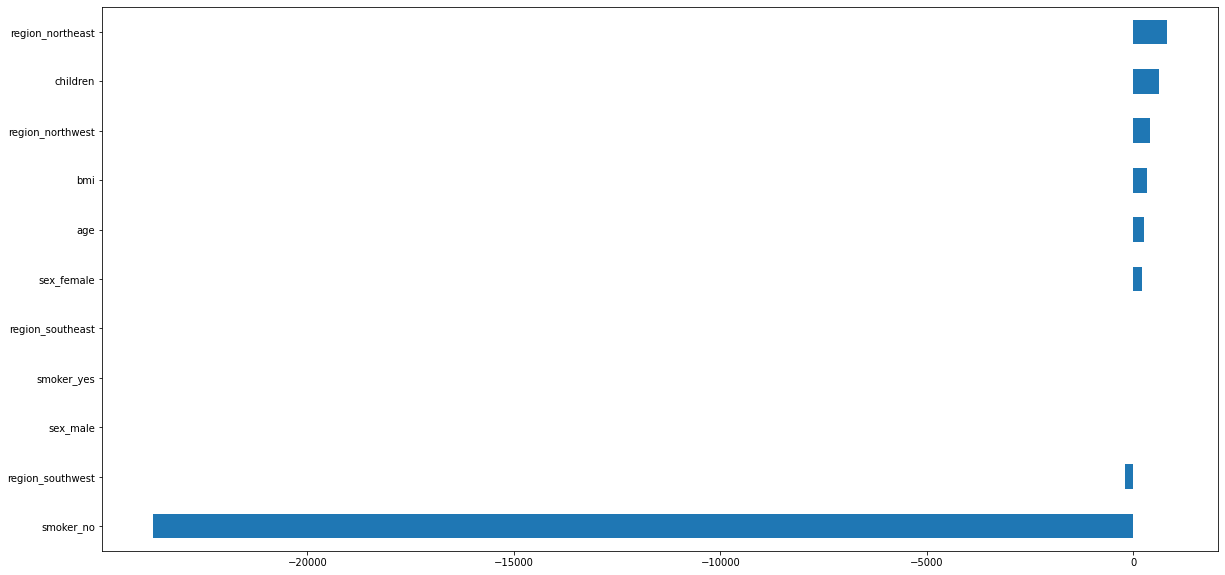

In [34]:
s2 = pd.Series(Lasso_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind = 'barh')

# Finally selected Linear model as best model :

In [35]:
LinReg_model

LinearRegression()

In [36]:
project_data = {"feature":list(x.columns)}

In [37]:
import pickle ; import json

In [38]:
with open("model.pkl","wb") as f:
    pickle.dump(LinReg_model,f)
    
with open("project_data.json","w") as f:
    json.dump(project_data,f)